# TREND ANALYSIS USING NEURAL NETWORKS

<b><h3> Importing necessary libraries</h3></b>

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import pandas as pd
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error,r2_score





<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Training data Preprocessing

In [2]:
news_df = pd.read_csv('training_data.csv')

# Remove duplicates
news_df.drop_duplicates(subset='headline', inplace=True)

# Clean text
# news_df['headline'] = news_df['headline'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # remove punctuation
# news_df['headline'] = news_df['headline'].apply(lambda x: x.lower())  # convert to lowercase
news_df['headline'] = news_df['headline'].apply(lambda x: str(x)) # convert to string
news_df['headline'] = news_df['headline'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # remove punctuation
news_df['headline'] = news_df['headline'].apply(lambda x: x.lower())  # convert to lowercase
# news_df['Title'] = news_df['Title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))  # remove punctuation
# news_df['Title'] = news_df['Title'].apply(lambda x: x.lower())  # convert to lowercase

# Remove stop words
stop_words = stopwords.words('english')
news_df['headline'] = news_df['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Stem words
stemmer = PorterStemmer()
news_df['headline'] = news_df['headline'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Lemmatize words
lemmatizer = WordNetLemmatizer()
news_df['headline'] = news_df['headline'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


### Vectorization 

<b>TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a commonly used technique in natural language processing for converting textual data into a numerical format that can be used for machine learning algorithms.</b>

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Define features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(news_df['headline'])
y = news_df['category']


In [4]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Word Embeddings using GloVe

<b>GloVe (Global Vectors for Word Representation) is a popular algorithm for generating word embeddings, which are numerical representations of words that capture their semantic meaning based on their context in a text corpus.</b>

<b>Unlike some other word embedding techniques, GloVe uses global matrix factorization to learn the co-occurrence probabilities of words in a corpus, rather than relying on local context windows. This allows GloVe to capture more complex relationships between words and produce embeddings that are useful for a variety of natural language processing tasks, such as sentiment analysis, machine translation, and question-answering.</b>


<b>The embeddings can also be fine-tuned on a smaller corpus or specific task to improve their performance on that particular task.</b>

In [6]:
import numpy as np

# Load pre-trained word embeddings
embeddings_index = {}
with open('glove.42B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Define a function to convert a sentence to a vector using word embeddings
def sentence_to_vector(sentence):
    words = sentence.split()
    vectors = []
    for word in words:
        if word in embeddings_index:
            vectors.append(embeddings_index[word])
    if len(vectors) == 0:
        return np.zeros(300) # assuming 300-dimensional embeddings
    else:
        return np.mean(vectors, axis=0)

# Convert the training and test data to a list of sentences
X_train_sentences = [' '.join(map(str, row)) for row in X_train]
X_test_sentences = [' '.join(map(str, row)) for row in X_test]

# Apply the function to convert the training and test data to feature vectors
X_train = [sentence_to_vector(sentence) for sentence in X_train_sentences]
X_test = [sentence_to_vector(sentence) for sentence in X_test_sentences]


In [7]:
# import numpy as np

from scipy.sparse import csr_matrix
import numpy as np

# Load pre-trained word embeddings
embeddings_index = {}
with open('glove.42B.300d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Define a function to convert a row to a vector using word embeddings
def row_to_vector(row):
    words = [str(i) for i in row.indices]
    vectors = []
    for word in words:
        if word in embeddings_index:
            vectors.append(embeddings_index[word])
    if len(vectors) == 0:
        return np.zeros(300) # assuming 300-dimensional embeddings
    else:
        return np.mean(vectors, axis=0)

X_train = csr_matrix(X_train)
X_test = csr_matrix(X_test)
# Apply the function to convert the training and test data to feature vectors
X_train = [row_to_vector(row) for row in X_train]
X_test = [row_to_vector(row) for row in X_test]

# Convert the list of feature vectors to a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)



## TESTING DIFFERENT MODELS - (not great F1 scores were obtained so went forward and implemented Neural Networks (scroll down the notebook))

In [8]:
# #L1 Regularization-Random Forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Create random forest classifier with L1 regularization
# model = RandomForestClassifier(class_weight='balanced', random_state=42)

# # Train model on train data
# model.fit(X_train, y_train)

# # Predict on train and test data
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # Evaluate model performance on train data
# train_accuracy = accuracy_score(y_train, y_train_pred)
# train_precision = precision_score(y_train, y_train_pred, average='weighted')
# train_recall = recall_score(y_train, y_train_pred, average='weighted')
# train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# print("Train Accuracy: ", train_accuracy)
# print("Train Precision: ", train_precision)
# print("Train Recall: ", train_recall)
# print("Train F1 Score: ", train_f1)

# # Evaluate model performance on test data
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_precision = precision_score(y_test, y_test_pred, average='weighted')
# test_recall = recall_score(y_test, y_test_pred, average='weighted')
# test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# print("Test Accuracy: ", test_accuracy)
# print("Test Precision: ", test_precision)
# print("Test Recall: ", test_recall)
# print("Test F1 Score: ", test_f1)


<h1>MLP CLASSIFIER - NEURAL NETWORKS</h1>

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the train set
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
model.fit(X_train, y_train)

# Predict on train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate model performance on train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Train Accuracy: ", train_accuracy)
print("Train Precision: ", train_precision)
print("Train Recall: ", train_recall)
print("Train F1 Score: ", train_f1)

# Evaluate model performance on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy: ", test_accuracy)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1 Score: ", test_f1)


Train Accuracy:  0.948400341701342
Train Precision:  0.9485523873163546
Train Recall:  0.948400341701342
Train F1 Score:  0.9483994772164479
Test Accuracy:  0.7008542298153762
Test Precision:  0.704530263406577
Test Recall:  0.7008542298153762
Test F1 Score:  0.7024651824822218


#### UHHHHH OHHHHHH!


<left><img src="images/uh-oh.png" width="200" height="100" /></left>

<b> Is this accurate enough? HMMMMMMMM.....Nope </b>

As we can see that the train F1 score is way too much higher than the test F1 and this denotes that the model is overfitting. 
Hence we go ahead and perform feature engineering by <b>Dimensionality reduction</b>
This involves reducing the number of features in the data while retaining as much information as possible. sklearn.decomposition.
</b>PCA is a commonly used technique for dimensionality reduction.<b>

## MLP WITH FEATURE EXTRACTION USING PCA COMPONENTS

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import TruncatedSVD

# Perform feature selection on the data
selector = SelectKBest(f_classif, k=4370)
X_new = selector.fit_transform(X, y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Perform PCA on the training set
pca = TruncatedSVD(n_components=4368)
X_train_pca = pca.fit_transform(X_train)

# Train the model on the principal components
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=900)
model.fit(X_train_pca, y_train)

# Transform test set using PCA
X_test_pca = pca.transform(X_test)

# Predict on train and test data
y_train_pred = model.predict(X_train_pca)
y_test_pred = model.predict(X_test_pca)

# Evaluate model performance on train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

print("Train Accuracy: ", train_accuracy)
print("Train Precision: ", train_precision)
print("Train Recall: ", train_recall)
print("Train F1 Score: ", train_f1)

# Evaluate model performance on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Accuracy: ", test_accuracy)
print("Test Precision: ", test_precision)
print("Test Recall: ", test_recall)
print("Test F1 Score: ", test_f1)


Train Accuracy:  0.9283253878585798
Train Precision:  0.9284036349562284
Train Recall:  0.9283253878585798
Train F1 Score:  0.928251450738195
Test Accuracy:  0.7093414163681455
Test Precision:  0.7132211642854709
Test Recall:  0.7093414163681455
Test F1 Score:  0.7110053829994698


<b>Okay! Let the model run</b>
<left><img src="images/running.gif" width="400" height="300" /></left>






#### Alassss! ooooooo...niceee, now it looks better. Reduced overfitting to the max.

<left><img src="images/minion.gif" width="400" height="300" /></left>

# INSIGHTS

## FEATURE IMPORTANCE

<b>Feature Importance: Since feature selection is performed using SelectKBest with f_classif, you can visualize the top K features that are selected using a bar chart or a heatmap.</b>

In [46]:
from sklearn.feature_selection import SelectKBest, f_classif

# Perform feature selection on the data
selector = SelectKBest(f_classif, k=20)
X_new = selector.fit_transform(X, y)
# # Get the feature names corresponding to the k-best features
# feature_names = list(X_new.columns[selector.get_support()])
# Get the feature names corresponding to the k-best features
# Get the feature names corresponding to the k-best features
feature_names = [word for (word, mask) in zip(vectorizer_test.get_feature_names(), selector.get_support()) if mask]


/Users/keerthanaakannan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


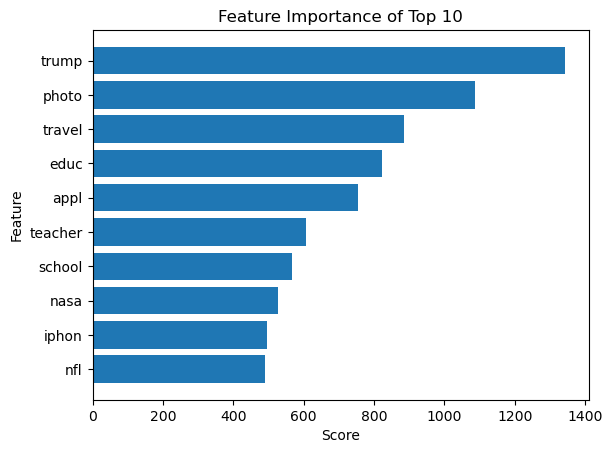

In [47]:
import matplotlib.pyplot as plt

# Get the feature scores
scores = selector.scores_

# Create a dictionary of feature names and scores
feature_dict = dict(zip(vectorizer.get_feature_names(), scores))

# Sort the dictionary by feature score in descending order
sorted_feature_dict = dict(sorted(feature_dict.items(), key=lambda item: item[1], reverse=True))

# # Get the top k features
k = 10
top_k_features = list(sorted_feature_dict.keys())[:k]

# Create a horizontal bar plot
plt.barh(range(k), [sorted_feature_dict[f] for f in top_k_features])
plt.gca().invert_yaxis()
plt.yticks(range(k), top_k_features)
plt.ylabel('Feature')
plt.xlabel('Score')
plt.title('Feature Importance of Top {}'.format(k))
plt.show()

## PCA COMPONENTS

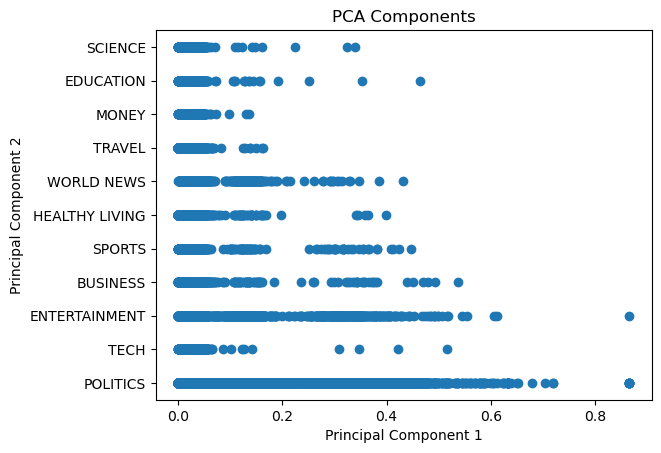

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

plt.scatter(X_train_pca[:, 0], y_train)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Components')
plt.show()


## CONFUSION MATRIX

<b>Confusion matrix provides a comprehensive summary of the performance of a classification model and can help identify areas for improvement. It is a useful tool for both evaluating the accuracy of a model and understanding its strengths and weaknesses.</b>

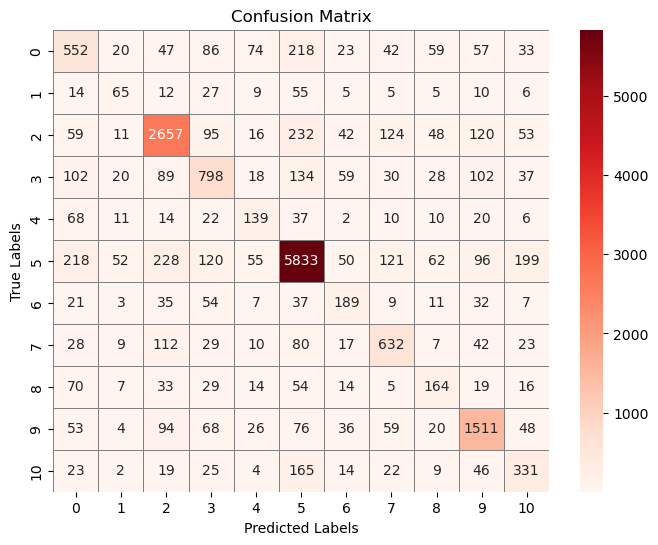

In [48]:
from sklearn.metrics import confusion_matrix

# Create a white figure with a size of 8x6 inches
plt.figure(figsize=(8,6), facecolor='white')
conf_mat = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_mat, cmap='Reds', annot=True, fmt='d',linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## TREND ANALYSIS

<b> Now comes the interesting part....So now that our model is built . Let's predict the trending categories according to the historic data with the live data feed.</b>

<left><img src="images/curious.gif" width="400" height="300" /></left>

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Load the dataset
data = pd.read_csv("output-merge.csv")

# Train the vectorizer
vectorizer_test = CountVectorizer(stop_words='english', max_features=5000)
vectorizer_test.fit(data['Title'])

# Save the trained vectorizer
joblib.dump(vectorizer_test, 'vectorizer.joblib')


['vectorizer.joblib']

In [43]:
# # # Predict on new data
# # new_data = pd.read_csv("output-merge.csv")
# # new_data_transformed = vectorizer.transform(new_data)
# # prediction = model.predict(new_data_transformed)

# # print(prediction)

# # Predict on new data
# new_data = pd.read_csv("output-merge.csv")
# new_data_transformed = vectorizer.transform(new_data)
# new_data_transformed_dense = new_data_transformed.toarray()
# prediction = model.predict(new_data_transformed_dense)

# print(prediction)
import joblib


# Load the trained vectorizer
vectorizer_test = joblib.load('vectorizer.joblib')

# Predict on new data
new_data = pd.read_csv("output-filtered.csv")
new_data_transformed = vectorizer_test.transform(data)
prediction = model.predict(new_data_transformed)

print(prediction)



['HEALTHY LIVING' 'WORLD NEWS' 'SCIENCE' 'TRAVEL' 'SPORTS' 'TRAVEL']


<b> Now when we plot we can see........</b>

<left><img src="images/see.gif" width="400" height="300" /></left>

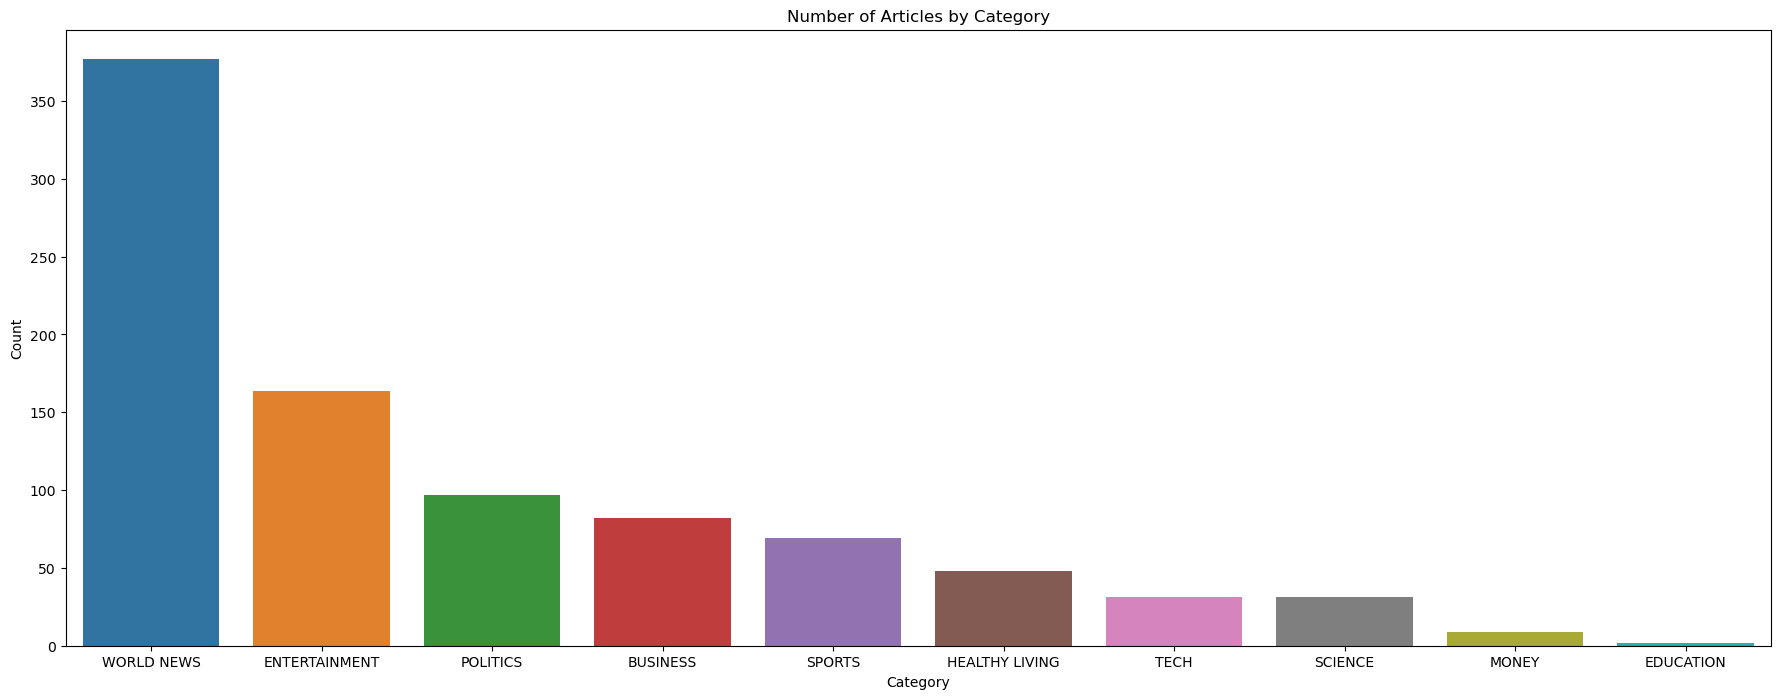

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count number of articles in each category
category_counts = new_data['Category'].value_counts()

# Create bar chart
fig, ax = plt.subplots(figsize=(22,8))
sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
ax.set_title('Number of Articles by Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.show()


<left><img src="images/dancing.gif" width="700" height="300" /></left>